<span style="font-size:28px; color:Purple;"> **Appendix** </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 20) # Show all rows
pd.set_option('display.max_columns', 20) # Show all columns
pd.options.display.float_format = '{:,.6f}'.format

In [2]:
# Read the required CSV files and perform necessary preprocessing
df_universe = pd.read_csv('../Data/data_us/univ_h.csv')
df_universe.set_index('year', inplace=True)

columns = ['Ticker', 'GICS_Code']
df_tickers = pd.read_csv('../Data/data_us/tickers.csv', header=None, names = columns, dtype=str)
df_tickers.set_index('Ticker', inplace=True)

df_adjusted = pd.read_csv('../Data/data_us/adjusted.csv')
df_adjusted['Date'] = pd.to_datetime(df_adjusted['Date'], format = '%Y%m%d')
df_adjusted.set_index('Date', inplace=True)
df_adjusted.columns = df_adjusted.columns.str.strip()

In [3]:
df_universe.head()

,0111145D,0202445Q,0203524D,0226226D,0544749D,0574018D,0772031D,0848680D,0867887D,0910150D,...,XOM,XRAY,XRX,XTO,XYL,YUM,ZBH,ZBRA,ZION,ZTS
year,,,,,,,,,,,,,,,,,,,,,
2004,1,1,1,1,1,0,1,1,0,1,...,1,0,1,0,0,1,1,0,1,0
2005,1,1,1,1,1,1,1,1,0,1,...,1,0,1,1,0,1,1,0,1,0
2006,1,1,1,1,1,1,1,1,0,1,...,1,0,1,1,0,1,1,0,1,0
2007,1,1,1,1,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,1,0
2008,1,1,1,1,0,0,1,1,0,0,...,1,0,1,1,0,1,1,0,1,0


In [4]:
df_tickers.tail()

,GICS_Code
Ticker,
YUM,25301040
ZBH,35101010
ZBRA,45203010
ZION,40101015
ZTS,35202010


In [5]:
df_adjusted.head()

,0111145D,0202445Q,0203524D,0226226D,0544749D,0574018D,0772031D,0848680D,0867887D,0910150D,...,XOM,XRAY,XRX,XTO,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,23.600000,42.990000,17.634400,46.155500,21.816700,23.197600,3.332900,14.117200,NaN,16.711400,...,20.422300,18.988200,19.318200,12.342400,NaN,8.290500,60.875100,43.586700,40.601100,NaN
2004-01-05,23.720000,43.060000,18.282400,45.355300,22.232600,23.214300,3.578300,14.696400,NaN,16.868400,...,20.899800,18.673700,19.645100,12.443100,NaN,8.411700,60.327200,43.666700,40.513400,NaN
2004-01-06,23.760000,42.500000,18.601900,46.553400,22.754800,23.197600,3.562500,15.284200,NaN,16.888000,...,20.759100,18.703400,20.000500,12.206700,NaN,8.663900,60.031500,43.766700,41.073200,NaN
2004-01-07,23.520000,43.390000,18.323500,46.332300,22.722400,22.997400,3.515000,15.085400,NaN,16.583800,...,20.608300,18.605700,20.071600,12.149800,NaN,8.515500,60.701200,44.500000,40.789900,NaN
2004-01-08,23.360000,43.590000,19.167800,43.936100,22.680800,22.980700,3.578300,15.301500,NaN,16.799700,...,20.558000,18.724700,20.128400,12.233000,NaN,8.540300,61.875200,44.600000,41.005700,NaN


<span style="font-size:20px; color:Purple;"> **Part - A** </span>

<span style='color:Purple'> **Question 1, 2** </span>

In [6]:
all_years_data = []

# Loop from 2005 to 2024
for year in range(2005, 2025):
    # Select tickers for the current year
    selected_tickers = df_universe.loc[year][df_universe.loc[year] == 1].index.tolist()

    # Extract data for the previous year (e.g., 2004 for 2005) and the current year (e.g., 2005)
    start_year = year - 1
    end_year = year
    df1 = df_adjusted.loc[f"{start_year}-01-01":f"{start_year}-12-31", selected_tickers].tail(25)
    df2 = df_adjusted.loc[f"{end_year}-01-01":f"{end_year}-12-31", selected_tickers]  
    df_filtered = pd.concat([df1, df2])

    # Convert to long format
    df_long = df_filtered.melt(ignore_index=False, var_name="Ticker", value_name="Price")

    # Sort values by Ticker and Date    
    df_long = df_long.sort_values(by=["Ticker", "Date"])

    # Calculate Simple Return
    df_long["Daily_simple_return"] = df_long.groupby("Ticker",group_keys=False)["Price"].apply(lambda x: x.pct_change())
    
    # Calculate Log Return
    df_long["Daily_log_return"] = df_long.groupby("Ticker",group_keys=False)["Price"].apply(lambda x: np.log(x / x.shift(1)))
    df_long.fillna(0, inplace = True)

    # Calculate Volatility (21-day rolling window)
    df_long["Volatility"] = df_long.groupby("Ticker",group_keys=False)["Daily_log_return"].apply(lambda x: x.rolling(window=21).std())
    df_long["Volatility"] = df_long["Volatility"].apply(lambda x: max(x, 0.005))

    # Calculate 5-day return (rolling sum)
    df_long["5_day_return"] = df_long.groupby("Ticker",group_keys=False)["Daily_log_return"].apply(lambda x: x.rolling(window=5).sum())
    df_long["5_day_return"] = df_long["5_day_return"].fillna(0)

    #Calculate Normalized 5-day return by dividing it with volatility
    df_long["Normalized_5_day_return"] = df_long["5_day_return"] / df_long["Volatility"]

    # Merge with df_tickers to get GICS_Code and extract Industry Code
    df_long = df_long.merge(df_tickers[['GICS_Code']], left_on="Ticker", right_index=True, how="left")
    df_long['Industry_code'] = df_long['GICS_Code'].astype(str).str[:6]
    df_long = df_long.drop(columns=['GICS_Code'])

    # Calculate Industry average 5-day return (for each date and industry code)
    df_long['Industry_avg_5_day_return'] = df_long.groupby(["Industry_code", df_long.index.date])["Normalized_5_day_return"].transform("mean")

    # Calculate alpha factor
    df_long["alpha_factor"] = df_long["Normalized_5_day_return"] - df_long["Industry_avg_5_day_return"]

    # Calculate Industry average daily return (for each date and industry code)
    df_long['Industry_avg_daily_return'] = df_long.groupby(["Industry_code", df_long.index.date])["Daily_log_return"].transform("mean")

    # Remove Industry average daily return from daily log return
    df_long["Industry_removed_daily_return"] = df_long["Daily_log_return"] - df_long["Industry_avg_daily_return"]

    # Rank Normalized 5-day return (largest = rank 1, smallest = rank N)
    df_long["Rank"] = df_long.groupby(df_long.index)["Normalized_5_day_return"].rank(ascending=False, method="first")

    # Calculate N (number of stocks on each date)
    df_long["N"] = df_long.groupby(df_long.index)["Normalized_5_day_return"].transform("count")

    # Apply ranking formula for ranked factor
    df_long["Ranked_factor"] = (df_long["N"] + 1 - 2 * df_long["Rank"]) / (df_long["N"] - 1)

    # Calculate Industry average ranked facto (for each date and industry code)
    df_long['Industry_avg_ranked_factor'] = df_long.groupby(["Industry_code", df_long.index.date])["Ranked_factor"].transform("mean")

    # Calculate alpha factor ranked
    df_long["alpha_factor_rank"] = df_long["Ranked_factor"] - df_long["Industry_avg_ranked_factor"]

    # Filter data for current year onwards
    df_long = df_long.loc[df_long.index >= f'{end_year}-01-01']

    # Append the results of the current year to the list
    all_years_data.append(df_long)

# Concatenate all yearly datasets into one grand dataset
df_grand = pd.concat(all_years_data)

In [7]:
df_grand.head()

,Ticker,Price,Daily_simple_return,Daily_log_return,Volatility,5_day_return,Normalized_5_day_return,Industry_code,Industry_avg_5_day_return,alpha_factor,Industry_avg_daily_return,Industry_removed_daily_return,Rank,N,Ranked_factor,Industry_avg_ranked_factor,alpha_factor_rank
Date,,,,,,,,,,,,,,,,,
2005-01-03,0111145D,26.790000,-0.017241,-0.017392,0.012329,-0.014453,-1.172219,nan,-0.040952,-1.131266,-0.012683,-0.004709,388.000000,500,-0.551102,0.011568,-0.562670
2005-01-04,0111145D,26.570000,-0.008212,-0.008246,0.012238,-0.032219,-2.632739,nan,-1.773800,-0.858939,-0.016698,0.008452,341.000000,500,-0.362725,0.064336,-0.427061
2005-01-05,0111145D,26.400000,-0.006398,-0.006419,0.011001,-0.029485,-2.680136,nan,-2.584019,-0.096117,-0.009282,0.002863,229.000000,500,0.086172,0.019584,0.066588
2005-01-06,0111145D,26.600000,0.007576,0.007547,0.010035,-0.028171,-2.807378,nan,-2.514027,-0.293351,0.003407,0.004141,275.000000,500,-0.098196,0.005432,-0.103628
2005-01-07,0111145D,26.390000,-0.007895,-0.007926,0.009858,-0.032435,-3.290385,nan,-2.633882,-0.656503,-0.001810,-0.006116,301.000000,500,-0.202405,-0.000622,-0.201783


In [8]:
df_grand.shape

(2527068, 17)

<span style='color:Purple'> **Question 3** </span>

In [11]:
# Shift Industry_removed_daily_return up by 1 day to align with time t
df_grand["Industry_removed_daily_return_shifted"] = df_grand.groupby("Ticker")["Industry_removed_daily_return"].shift(-1)

# Drop last day's data since we can't compute R(t+1)
df_grand = df_grand.dropna(subset=["Industry_removed_daily_return_shifted"])

# Initialize lists to store results
beta_series = []
r_squared_series = []

# Group by date and perform cross-sectional regression
for date, group in df_grand.groupby(df_grand.index):
    v_i_t = group["alpha_factor"]
    R_i_t1 = group["Industry_removed_daily_return_shifted"]
    
    # Compute beta(t)
    numerator = np.sum(R_i_t1 * v_i_t)
    denominator = np.sum(v_i_t * v_i_t)
    beta_t = numerator / denominator if denominator != 0 else np.nan  # Avoid division by zero

    # Compute residuals
    epsilon_t = R_i_t1 - beta_t * v_i_t
    sum_epsilon_sq = np.sum(epsilon_t ** 2)
    sum_R_sq = np.sum(R_i_t1 ** 2)
    
    # Compute R^2(t)
    r_squared_t = 1 - (sum_epsilon_sq / sum_R_sq) if sum_R_sq != 0 else np.nan

    # Store results
    beta_series.append((date, beta_t))
    r_squared_series.append((date, r_squared_t))

# Create DataFrame for beta and R² separately
df_beta_r2 = pd.DataFrame(beta_series, columns=["Date", "Beta"]).set_index("Date")
df_r2 = pd.DataFrame(r_squared_series, columns=["Date", "R^2"]).set_index("Date")

# Merge the two DataFrames into one beta dataset
df_beta_r2 = df_beta_r2.merge(df_r2, left_index=True, right_index=True)

In [12]:
df_beta_r2

,Beta,R^2
Date,,
2005-01-03,-0.000937,0.007912
2005-01-04,-0.000515,0.002367
2005-01-05,-0.000620,0.005109
2005-01-06,0.000143,0.000528
2005-01-07,-0.000175,0.001344
...,...,...
2024-12-23,-0.000377,0.009806
2024-12-24,0.000099,0.000434
2024-12-26,-0.000202,0.002632


<span style='color:Purple'> **Question 4** </span>

In [13]:
# Ensure 'Date' column is datetime type if not already
df_beta_r2["Year"] = df_beta_r2.index.year  # Extract year from DateTime index

# Aggregate at the yearly level
df_beta_stats = df_beta_r2.groupby("Year")["Beta"].agg(
    Mean_Beta="mean",
    Std_Beta="std",
    Count_Beta="count"  # Should be ~250 per year
).reset_index()

# Compute t-statistic
df_beta_stats["t_stat"] = np.sqrt(df_beta_stats["Count_Beta"]) * (df_beta_stats["Mean_Beta"] / df_beta_stats["Std_Beta"])

# Display results
print(df_beta_stats)

    Year  Mean_Beta  Std_Beta  Count_Beta    t_stat
0   2005  -0.000071  0.000677         252 -1.668749
1   2006  -0.000103  0.000667         251 -2.450820
2   2007  -0.000076  0.000997         251 -1.215268
3   2008  -0.000422  0.004450         253 -1.510077
4   2009  -0.000124  0.002077         252 -0.944924
5   2010  -0.000053  0.000767         252 -1.092108
6   2011  -0.000187  0.001319         252 -2.253198
7   2012   0.000045  0.000662         250  1.067904
8   2013  -0.000057  0.000556         252 -1.633802
9   2014  -0.000026  0.000634         252 -0.649245
10  2015  -0.000019  0.000874         252 -0.344989
11  2016  -0.000070  0.001058         252 -1.048558
12  2017  -0.000041  0.000599         251 -1.080492
13  2018   0.000023  0.000932         251  0.394479
14  2019   0.000097  0.001161         252  1.327495
15  2020  -0.000369  0.003775         253 -1.555849
16  2021   0.000014  0.001478         252  0.149436
17  2022  -0.000019  0.001787         251 -0.167628
18  2023  -0

<span style='color:Purple'> **Question 5** </span>

In [14]:
# Initialize lists to store results for ranked alpha factor
beta_series_ranked = []
r_squared_series_ranked = []

# Group by date and perform cross-sectional regression with ranked alpha factor
for date, group in df_grand.groupby(df_grand.index):
    v_i_t_ranked = group["alpha_factor_rank"]
    R_i_t1 = group["Industry_removed_daily_return_shifted"]
    
    # Compute beta(t) for ranked alpha factor
    numerator = np.sum(R_i_t1 * v_i_t_ranked)
    denominator = np.sum(v_i_t_ranked * v_i_t_ranked)
    beta_t_ranked = numerator / denominator if denominator != 0 else np.nan  # Avoid division by zero

    # Compute residuals
    epsilon_t_ranked = R_i_t1 - beta_t_ranked * v_i_t_ranked
    sum_epsilon_sq = np.sum(epsilon_t_ranked ** 2)
    sum_R_sq = np.sum(R_i_t1 ** 2)
    
    # Compute R^2(t) for ranked alpha factor
    r_squared_t_ranked = 1 - (sum_epsilon_sq / sum_R_sq) if sum_R_sq != 0 else np.nan

    # Store results
    beta_series_ranked.append((date, beta_t_ranked))
    r_squared_series_ranked.append((date, r_squared_t_ranked))

# Create DataFrame for beta and R² separately (using ranked alpha factor)
df_beta_r2_ranked = pd.DataFrame(beta_series_ranked, columns=["Date", "Beta_Ranked"]).set_index("Date")
df_r2_ranked = pd.DataFrame(r_squared_series_ranked, columns=["Date", "R^2_Ranked"]).set_index("Date")

# Merge the two DataFrames into one beta dataset
df_beta_r2_ranked = df_beta_r2_ranked.merge(df_r2_ranked, left_index=True, right_index=True)

In [15]:
df_beta_r2_ranked

,Beta_Ranked,R^2_Ranked
Date,,
2005-01-03,-0.002531,0.009236
2005-01-04,-0.001855,0.004733
2005-01-05,-0.001968,0.005826
2005-01-06,0.000166,0.000063
2005-01-07,-0.000379,0.000462
...,...,...
2024-12-23,-0.001572,0.017163
2024-12-24,0.000405,0.000960
2024-12-26,-0.000586,0.003162


In [16]:
# Ensure 'Date' column is datetime type if not already
df_beta_r2_ranked["Year"] = df_beta_r2_ranked.index.year  # Extract year from DateTime index

# Aggregate at the yearly level
df_beta_stats_ranked = df_beta_r2_ranked.groupby("Year")["Beta_Ranked"].agg(
    Mean_Beta="mean",
    Std_Beta="std",
    Count_Beta="count"
).reset_index()

# Compute t-statistic
df_beta_stats_ranked["t_stat"] = np.sqrt(df_beta_stats_ranked["Count_Beta"]) * (df_beta_stats_ranked["Mean_Beta"] / df_beta_stats_ranked["Std_Beta"])

# Display results
print(df_beta_stats_ranked)

    Year  Mean_Beta  Std_Beta  Count_Beta    t_stat
0   2005  -0.000257  0.002014         252 -2.027004
1   2006  -0.000402  0.002035         251 -3.131211
2   2007  -0.000224  0.003288         251 -1.078360
3   2008  -0.000970  0.010362         253 -1.489546
4   2009  -0.000079  0.005424         252 -0.232261
5   2010  -0.000159  0.002055         252 -1.226659
6   2011  -0.000339  0.002971         252 -1.812117
7   2012   0.000062  0.002059         250  0.476460
8   2013  -0.000209  0.001673         252 -1.981417
9   2014  -0.000070  0.002050         252 -0.545735
10  2015  -0.000100  0.002474         252 -0.643860
11  2016  -0.000205  0.003286         252 -0.988287
12  2017  -0.000226  0.002046         251 -1.751343
13  2018   0.000081  0.002707         251  0.476457
14  2019   0.000190  0.003204         252  0.941279
15  2020  -0.000836  0.010800         253 -1.230735
16  2021  -0.000034  0.004815         252 -0.112421
17  2022  -0.000142  0.005495         251 -0.410177
18  2023  -0

<span style="font-size:20px; color:Purple;"> **Part - B** </span>

<span style='color:Purple'> **Question 1** </span>

In [17]:
# Initialize an empty list to store the results for each year
portfolio_results = []
portfolio_results_cost = []
trading_cost_bps = 5
trading_cost = trading_cost_bps / 10000

# Create an empty DataFrame to store daily portfolio returns
daily_portfolio_df = pd.DataFrame(columns=["Date", "Portfolio_Return"])
daily_portfolio_df_cost = pd.DataFrame(columns=["Date", "Portfolio_Return"])

# Loop through each year from 2006 to 2024
for year in range(2006, 2025):
    # Get the previous year's average beta (β_v) for the current year
    avg_beta_v = df_beta_stats.loc[df_beta_stats["Year"] == (year - 1), "Mean_Beta"].values[0]

    # Filter the df_grand_rank for the current year
    df_year = df_grand[df_grand.index.year == year].copy()

    # Calculate expected returns R_Ei(t,t+1) = β_v * v_i(t)
    df_year["Expected_Return"] = avg_beta_v * df_year["alpha_factor_rank"]

    # Calculate returns for long and short positions (r_L and r_S)
    df_year = df_year.sort_values(by=["Ticker", "Date"])
    df_year["Daily_log_return_Shifted"] = df_year.groupby("Ticker")["Daily_log_return"].shift(-1)
    df_year["Daily_log_return_Shifted"] = df_year["Daily_log_return_Shifted"].fillna(0)  # Assuming no return for the last day

    # df_year["Daily_log_return_Shifted_Minus_Cost"] = df_year["Daily_log_return_Shifted"] - trading_cost
    # df_year["Daily_log_return_Shifted_Plus_Cost"] = df_year["Daily_log_return_Shifted"] + trading_cost
    
    # Initialize a list to store daily portfolio returns
    daily_portfolio_returns = []
    daily_portfolio_returns_cost = []
    
    # Loop through each date and calculate the portfolio return for that day
    for date, df_date in df_year.groupby(df_year.index.date):
        # Calculate N, N_l, N_s for the current day
        N = len(df_date["Ticker"].unique())  # Number of unique stocks on this day
        N_l = int(0.2 * N)
        N_s = int(0.2 * N)

        # Rank the stocks based on the expected returns (top 20% long, bottom 20% short)
        df_date["Stock_Rank"] = df_date["Expected_Return"].rank(method="first", ascending=False)
        
        # Split stocks into long and short portfolios based on rank
        df_date["Position"] = None
        df_date.loc[df_date["Stock_Rank"] <= N_l, "Position"] = "Long"
        df_date.loc[df_date["Stock_Rank"] > (N - N_s), "Position"] = "Short"
        
        # Calculate daily portfolio return
        long_returns = df_date.loc[df_date["Position"] == "Long", "Daily_log_return_Shifted"].sum()
        short_returns = df_date.loc[df_date["Position"] == "Short", "Daily_log_return_Shifted"].sum()
        portfolio_return = (long_returns - short_returns) / N_l  # Portfolio return for the day
        
        # Calculate daily portfolio return cost
        # long_return_cost = df_date.loc[df_date["Position"] == "Long", "Daily_log_return_Shifted_Minus_Cost"].sum()
        # short_returns_cost = df_date.loc[df_date["Position"] == "Short", "Daily_log_return_Shifted_Plus_Cost"].sum()
        #portfolio_return_cost = (long_return_cost - short_returns_cost) / N_l  # Portfolio return for the day
        portfolio_return_cost = portfolio_return - 2 * trading_cost
        
        # Append to daily portfolio returns list
        daily_portfolio_returns.append(portfolio_return)
        daily_portfolio_df = pd.concat([daily_portfolio_df, pd.DataFrame({"Date": [date], "Portfolio_Return": [portfolio_return]})], ignore_index=True)
        daily_portfolio_returns_cost.append(portfolio_return_cost)
        daily_portfolio_df_cost = pd.concat([daily_portfolio_df_cost, pd.DataFrame({"Date": [date], "Portfolio_Return": [portfolio_return_cost]})], ignore_index=True)

    # Compute annual return (sum of daily returns)
    annual_return = np.sum(daily_portfolio_returns)
    annual_return_cost  = np.sum(daily_portfolio_returns_cost)

    # Compute annualized return volatility (standard deviation of daily returns * sqrt(252))
    annual_volatility = np.std(daily_portfolio_returns) * np.sqrt(252)
    annual_volatility_cost  = np.std(daily_portfolio_returns_cost ) * np.sqrt(252)

    sharpe_ratio = annual_return / annual_volatility_cost              ##assuming risk free rate as 0
    sharpe_ratio_cost = annual_return_cost / annual_volatility_cost
        
    # Store the results for the year
    portfolio_results.append({"Year": year, "Annual Return": annual_return, "Annualized Volatility": annual_volatility, "Sharpe Ratio":sharpe_ratio})
    portfolio_results_cost.append({"Year": year, "Annual Return": annual_return_cost, "Annualized Volatility": annual_volatility_cost, "Sharpe Ratio":sharpe_ratio_cost})

daily_portfolio_df.set_index('Date', inplace=True)
daily_portfolio_df_cost.set_index('Date', inplace=True)

# Convert results to DataFrame
df_portfolio_results = pd.DataFrame(portfolio_results)
df_portfolio_results_cost = pd.DataFrame(portfolio_results_cost)


<span style='color:Purple'> **Question 2** </span>

In [18]:
daily_portfolio_df

,Portfolio_Return
Date,
2006-01-03,0.002965
2006-01-04,0.001805
2006-01-05,0.003303
2006-01-06,-0.001560
2006-01-09,-0.000021
...,...
2024-12-23,0.001830
2024-12-24,-0.000896
2024-12-26,0.000550


<span style='color:Purple'> **Question 3** </span>

In [19]:
df_portfolio_results  #annual results

,Year,Annual Return,Annualized Volatility,Sharpe Ratio
0,2006,0.136167,0.043784,3.109949
1,2007,0.084059,0.072636,1.157252
2,2008,0.304647,0.218711,1.392919
3,2009,0.005841,0.117122,0.049872
4,2010,0.028826,0.047688,0.604467
5,2011,0.121377,0.064137,1.892468
6,2012,-0.005581,0.045734,-0.122022
7,2013,-0.060649,0.037058,-1.636617
8,2014,0.015236,0.043286,0.351992
9,2015,0.048483,0.052046,0.931540


In [20]:
print('Best and Worst years based on annual returns')
best_year = df_portfolio_results.loc[df_portfolio_results["Annual Return"].idxmax()]
worst_year = df_portfolio_results.loc[df_portfolio_results["Annual Return"].idxmin()]

# Convert and print the year as an integer
print("\nBest Year for the Strategy:", int(best_year["Year"]), ' Annual Return:', best_year["Annual Return"], 
      '  \nAnnualized Volatility:', best_year["Annualized Volatility"], '   Sharpe Ratio:', best_year["Sharpe Ratio"])
print()
print("Worst Year for the Strategy:", int(worst_year["Year"]), '  Annual Return:', worst_year["Annual Return"], 
      '  \nAnnualized Volatility:', worst_year["Annualized Volatility"], '   Sharpe Ratio:', worst_year["Sharpe Ratio"])

Best and Worst years based on annual returns

Best Year for the Strategy: 2008  Annual Return: 0.304646505669631   
Annualized Volatility: 0.2187108186779251    Sharpe Ratio: 1.392919232396342

Worst Year for the Strategy: 2020   Annual Return: -0.28817688820065224   
Annualized Volatility: 0.2072606097895504    Sharpe Ratio: -1.3904083776133975


In [21]:
print('Best and Worst years based on sharpe ratio')
best_year = df_portfolio_results.loc[df_portfolio_results["Sharpe Ratio"].idxmax()]
worst_year = df_portfolio_results.loc[df_portfolio_results["Sharpe Ratio"].idxmin()]

# Convert and print the year as an integer
print("\nBest Year for the Strategy:", int(best_year["Year"]), ' Annual Return:', best_year["Annual Return"], 
      '  \nAnnualized Volatility:', best_year["Annualized Volatility"], '   Sharpe Ratio:', best_year["Sharpe Ratio"])

print("\nWorst Year for the Strategy:", int(worst_year["Year"]), '  Annual Return:', worst_year["Annual Return"], 
      '  \nAnnualized Volatility:', worst_year["Annualized Volatility"], '   Sharpe Ratio:', worst_year["Sharpe Ratio"])

Best and Worst years based on sharpe ratio

Best Year for the Strategy: 2006  Annual Return: 0.1361665993018638   
Annualized Volatility: 0.04378419423709016    Sharpe Ratio: 3.109948730917042

Worst Year for the Strategy: 2013   Annual Return: -0.06064906723006745   
Annualized Volatility: 0.037057578771397225    Sharpe Ratio: -1.636617103459529


<span style='color:Purple'> **Question 4** </span>

In [22]:
# Assuming you have loaded both DataFrames
merged_df = daily_portfolio_df.merge(daily_portfolio_df_cost, on="Date", suffixes=("_no_cost", "_with_cost"))
print('Comparison of Portfolio returns with and without cost')
# Display the merged DataFrame
print(merged_df)

Comparison of Portfolio returns with and without cost
            Portfolio_Return_no_cost  Portfolio_Return_with_cost
Date                                                            
2006-01-03                  0.002965                    0.001965
2006-01-04                  0.001805                    0.000805
2006-01-05                  0.003303                    0.002303
2006-01-06                 -0.001560                   -0.002560
2006-01-09                 -0.000021                   -0.001021
...                              ...                         ...
2024-12-23                  0.001830                    0.000830
2024-12-24                 -0.000896                   -0.001896
2024-12-26                  0.000550                   -0.000450
2024-12-27                 -0.001698                   -0.002698
2024-12-30                  0.000000                   -0.001000

[4780 rows x 2 columns]


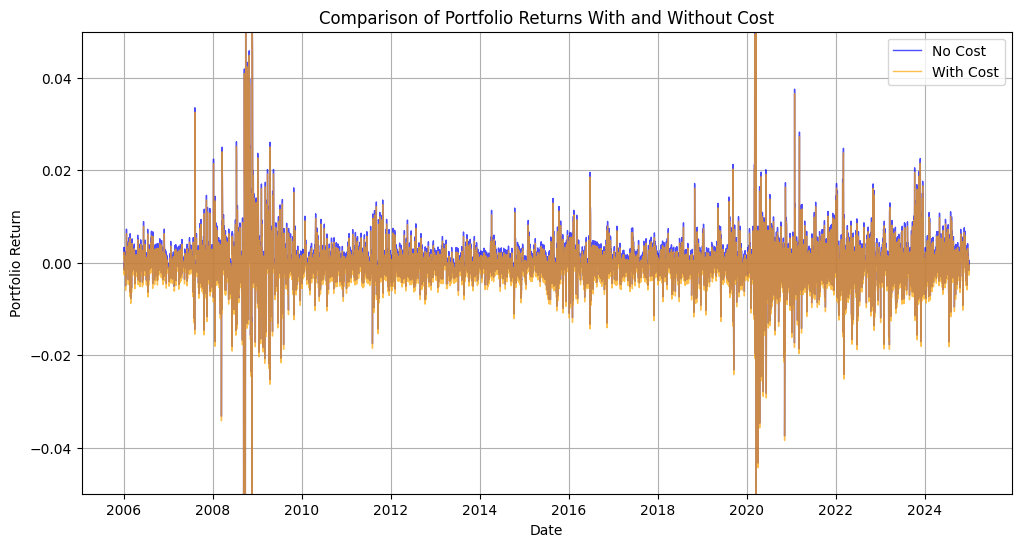

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index, merged_df["Portfolio_Return_no_cost"], label="No Cost", linewidth=1, color="blue", alpha=0.7)
plt.plot(merged_df.index, merged_df["Portfolio_Return_with_cost"], label="With Cost", linewidth=1, color="orange", alpha=0.7)

plt.xlabel("Date")
plt.ylabel("Portfolio Return")
plt.title("Comparison of Portfolio Returns With and Without Cost")
plt.legend()
plt.grid(True)

# Adjust y-axis to focus on smaller return differences
plt.ylim(-0.05, 0.05)  # This will zoom in on the range where most values lie

plt.show()


In [24]:
df_portfolio_results_cost  # annual returns with cost

,Year,Annual Return,Annualized Volatility,Sharpe Ratio
0,2006,-0.114833,0.043784,-2.622714
1,2007,-0.166941,0.072636,-2.298315
2,2008,0.051647,0.218711,0.236141
3,2009,-0.246159,0.117122,-2.101722
4,2010,-0.223174,0.047688,-4.679927
5,2011,-0.130623,0.064137,-2.036641
6,2012,-0.255581,0.045734,-5.588378
7,2013,-0.312649,0.037058,-8.436846
8,2014,-0.236764,0.043286,-5.469810
9,2015,-0.203517,0.052046,-3.910286


In [25]:
print('Best and Worst years based on annual returns taking cost into account')
best_year_cost = df_portfolio_results_cost.loc[df_portfolio_results_cost["Annual Return"].idxmax()]
worst_year_cost = df_portfolio_results_cost.loc[df_portfolio_results_cost["Annual Return"].idxmin()]

print("\nBest Year for the Strategy:", int(best_year_cost["Year"]), ' Annual Return:', best_year_cost["Annual Return"], 
      '  \nAnnualized Volatility:', best_year_cost["Annualized Volatility"], '   Sharpe Ratio:', best_year_cost["Sharpe Ratio"])

print("\nWorst Year for the Strategy:", int(worst_year_cost["Year"]), '  Annual Return:', worst_year_cost["Annual Return"], 
      '  \nAnnualized Volatility:', worst_year_cost["Annualized Volatility"], '   Sharpe Ratio:', worst_year_cost["Sharpe Ratio"])

Best and Worst years based on annual returns taking cost into account

Best Year for the Strategy: 2008  Annual Return: 0.05164650566963093   
Annualized Volatility: 0.2187108186779251    Sharpe Ratio: 0.23614060786670957

Worst Year for the Strategy: 2020   Annual Return: -0.5411768882006521   
Annualized Volatility: 0.2072606097895504    Sharpe Ratio: -2.611093775851358


In [26]:
print('Best and Worst years based on sharpe ratio taking cost into account')
best_year_cost = df_portfolio_results_cost.loc[df_portfolio_results_cost["Sharpe Ratio"].idxmax()]
worst_year_cost = df_portfolio_results_cost.loc[df_portfolio_results_cost["Sharpe Ratio"].idxmin()]

print("\nBest Year for the Strategy:", int(best_year_cost["Year"]), ' Annual Return:', best_year_cost["Annual Return"], 
      '  \nAnnualized Volatility:', best_year_cost["Annualized Volatility"], '   Sharpe Ratio:', best_year_cost["Sharpe Ratio"])

print("\nWorst Year for the Strategy:", int(worst_year_cost["Year"]), '  Annual Return:', worst_year_cost["Annual Return"], 
      '  \nAnnualized Volatility:', worst_year_cost["Annualized Volatility"], '   Sharpe Ratio:', worst_year_cost["Sharpe Ratio"])

Best and Worst years based on sharpe ratio taking cost into account

Best Year for the Strategy: 2008  Annual Return: 0.05164650566963093   
Annualized Volatility: 0.2187108186779251    Sharpe Ratio: 0.23614060786670957

Worst Year for the Strategy: 2013   Annual Return: -0.31264906723006747   
Annualized Volatility: 0.037057578771397225    Sharpe Ratio: -8.436845514348192


<span style='color:Purple'> **Another Way to do Question 4** </span>

<span style='color:Green'> **Taking cost based on changing positions** </span>

In [29]:
# Initialize an empty list to store the results for each year
portfolio_results2 = []
portfolio_results_cost2 = []
trading_cost_bps = 5
trading_cost = trading_cost_bps / 10000

# Create an empty DataFrame to store daily portfolio returns
daily_portfolio_df2 = pd.DataFrame(columns=["Date", "Portfolio_Return"])
daily_portfolio_df_cost2 = pd.DataFrame(columns=["Date", "Portfolio_Return"])

# Loop through each year from 2006 to 2024
for year in range(2006, 2025):
    # Get the previous year's average beta (β_v) for the current year
    avg_beta_v = df_beta_stats.loc[df_beta_stats["Year"] == (year - 1), "Mean_Beta"].values[0]

    # Filter the df_grand_rank for the current year
    df_year = df_grand[df_grand.index.year == year].copy()

    # Calculate expected returns R_Ei(t,t+1) = β_v * v_i(t)
    df_year["Expected_Return"] = avg_beta_v * df_year["alpha_factor_rank"]

    # Calculate returns for long and short positions (r_L and r_S)
    df_year = df_year.sort_values(by=["Ticker", "Date"])
    df_year["Daily_simple_return_Shifted"] = df_year.groupby("Ticker")["Daily_simple_return"].shift(-1)
    df_year["Daily_simple_return_Shifted"].fillna(0, inplace=True)  # Assuming no return for the last day

    # Initialize signal DataFrame
    df_year["Signal"] = 0
    
    # Initialize a list to store daily portfolio returns
    daily_portfolio_returns = []
    daily_portfolio_returns_cost = []
    
    # Loop through each date and calculate the portfolio return for that day
    for date, df_date in df_year.groupby(df_year.index.date):
        N = len(df_date["Ticker"].unique())  # Number of unique stocks on this day
        if N == 0:
            continue
        
        N_l = int(0.2 * N)
        N_s = int(0.2 * N)

        df_date["Stock_Rank"] = df_date["Expected_Return"].rank(method="first", ascending=False)
        df_date.loc[df_date["Stock_Rank"] <= N_l, "Signal"] = 1  # Long
        df_date.loc[df_date["Stock_Rank"] > (N - N_s), "Signal"] = -1  # Short

        # Calculate portfolio return
        long_returns = df_date.loc[df_date["Signal"] == 1, "Daily_simple_return_Shifted"].sum()
        short_returns = df_date.loc[df_date["Signal"] == -1, "Daily_simple_return_Shifted"].sum()
        long_count = (df_date["Signal"] == 1).sum()
        
        portfolio_return = (long_returns - short_returns) / N_l if N_l > 0 else 0

        # Trading cost calculation
        df_date_shifted = df_date.shift(1).fillna(0)
        position_changes = (df_date_shifted["Signal"] != df_date["Signal"]).sum()
        active_stocks = (df_date["Signal"].abs() != 0).sum()
        trading_cost_penalty = trading_cost * position_changes / active_stocks if active_stocks > 0 else 0
        #trading_cost_penalty = trading_cost * position_changes
        portfolio_return_cost = portfolio_return - trading_cost_penalty
        
        # Append to daily portfolio returns list
        daily_portfolio_returns.append(portfolio_return)
        daily_portfolio_df2 = pd.concat([daily_portfolio_df2, pd.DataFrame({"Date": [date], "Portfolio_Return": [portfolio_return]})], ignore_index=True)
        daily_portfolio_returns_cost.append(portfolio_return_cost)
        daily_portfolio_df_cost2 = pd.concat([daily_portfolio_df_cost2, pd.DataFrame({"Date": [date], "Portfolio_Return": [portfolio_return_cost]})], ignore_index=True)
    
    # Compute annual return (sum of daily returns)
    annual_return = np.sum(daily_portfolio_returns)
    annual_return_cost  = np.sum(daily_portfolio_returns_cost)

    # Compute annualized return volatility (standard deviation of daily returns * sqrt(252))
    annual_volatility = np.std(daily_portfolio_returns) * np.sqrt(252)
    annual_volatility_cost  = np.std(daily_portfolio_returns_cost ) * np.sqrt(252)

    sharpe_ratio = annual_return / annual_volatility_cost              ##assuming risk free rate as 0
    sharpe_ratio_cost = annual_return_cost / annual_volatility_cost
        
    # Store the results for the year
    portfolio_results2.append({"Year": year, "Annual Return": annual_return, "Annualized Volatility": annual_volatility, "Sharpe Ratio":sharpe_ratio})
    portfolio_results_cost2.append({"Year": year, "Annual Return": annual_return_cost, "Annualized Volatility": annual_volatility_cost, "Sharpe Ratio":sharpe_ratio_cost})

# Set index for daily portfolio returns
daily_portfolio_df2.set_index('Date', inplace=True)
daily_portfolio_df_cost2.set_index('Date', inplace=True)

# Convert results to DataFrame
df_portfolio_results2 = pd.DataFrame(portfolio_results)
df_portfolio_results_cost2 = pd.DataFrame(portfolio_results_cost)

In [30]:
# Assuming you have loaded both DataFrames
merged_df2 = daily_portfolio_df2.merge(daily_portfolio_df_cost2, on="Date", suffixes=("_no_cost", "_with_cost"))
print('Comparison of Portfolio returns with and without cost')
# Display the merged DataFrame
print(merged_df2)

Comparison of Portfolio returns with and without cost
            Portfolio_Return_no_cost  Portfolio_Return_with_cost
Date                                                            
2006-01-03                  0.002962                    0.002279
2006-01-04                  0.001760                    0.001065
2006-01-05                  0.003404                    0.002701
2006-01-06                 -0.001577                   -0.002272
2006-01-09                  0.000009                   -0.000689
...                              ...                         ...
2024-12-23                  0.001868                    0.001188
2024-12-24                 -0.000887                   -0.001554
2024-12-26                  0.000554                   -0.000116
2024-12-27                 -0.001682                   -0.002352
2024-12-30                  0.000000                   -0.000715

[4780 rows x 2 columns]


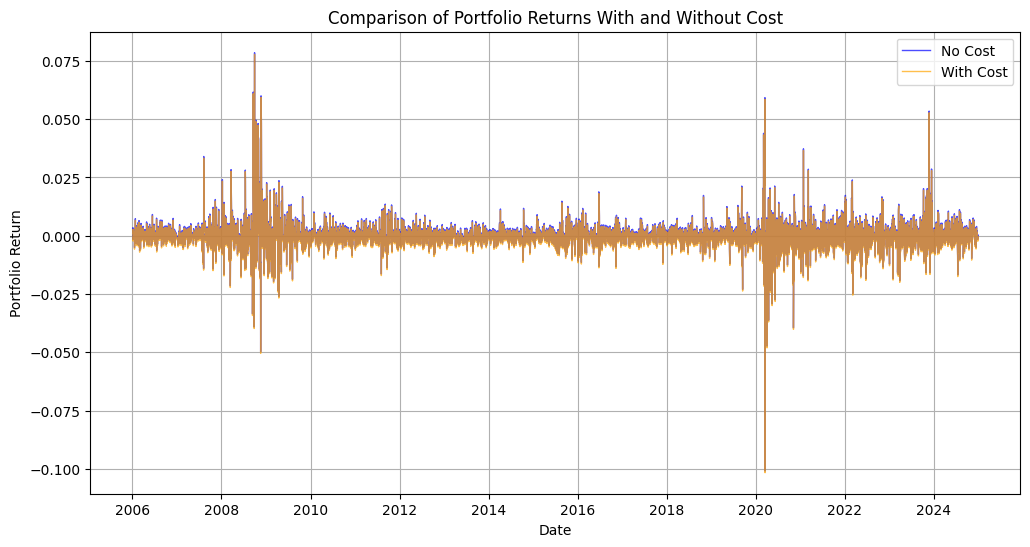

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df2.index, merged_df2["Portfolio_Return_no_cost"], label="No Cost", linewidth=1, color="blue", alpha=0.7)
plt.plot(merged_df2.index, merged_df2["Portfolio_Return_with_cost"], label="With Cost", linewidth=1, color="orange", alpha=0.7)

plt.xlabel("Date")
plt.ylabel("Portfolio Return")
plt.title("Comparison of Portfolio Returns With and Without Cost")
plt.legend()
plt.grid(True)

# Adjust y-axis to focus on smaller return differences

plt.show()
